In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
from primordialpy.pbhabundance import PBHAbundance

import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
V = 'V0*(tanh(phi/sqrt(6)))**2*(1 + A*(sech((phi - phi0)/sigma))**2)'
parameters = {'V0' : 1.495e-10, 'A' : 1.080552e-3, 'phi0' : 5.301327, 'sigma': 1.940550e-2}
potential = PotentialFunction.from_string(V, param_values=parameters) 

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 6.3) 
background.solve()
background.save_data()

In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = [background.data[i] for i in vars]
Nend = background.data['N'][-1]

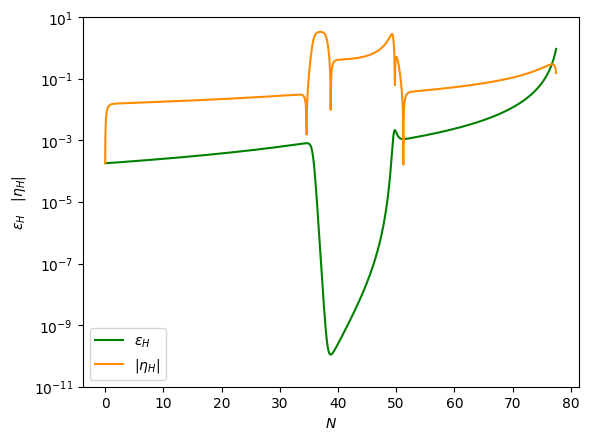

In [6]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')

plt.yscale('log')
plt.ylim(1e-11, 10)
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 3)
#plt.title('Slow-roll parameters')


In [25]:
pert = Perturbations(potential, background, scale= 'PBH', N_CMB = 63)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
#print(f'El modo {k_pivot} cruza el horizonte a {Npivot[0]} e-folds')
sol = pert.solver()

In [26]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)


In [27]:
P_s_pivot, P_t_pivot, r_pivot

(2.106279393763463e-09, 9.741737139697572e-12, 0.004625092553505547)

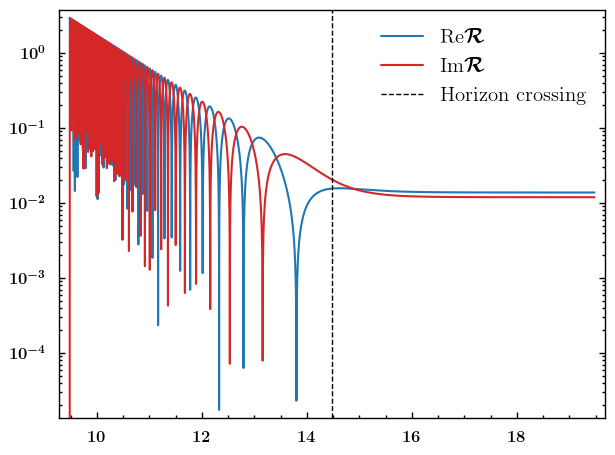

In [28]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


In [29]:
PS = pert.Power_spectrum(save = True)

k_peak = 3.97\times 10^{+08} Mpc^-1
N_peak = 37.28467957725112
P_s(k_peak) = 0.035293439616516195
Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

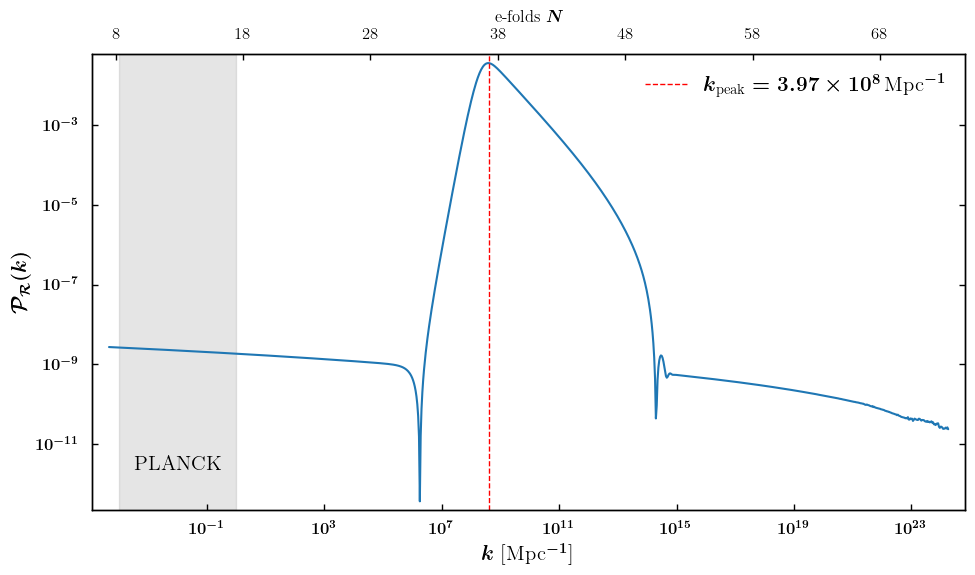

In [30]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save = True)

In [31]:
print(pert.Spectral_tilts)

{'n_s': 0.9602570098779712, 'n_t': -0.0007230462234252136}


In [32]:
pbh = PBHAbundance(pert, delta_c=0.4, gamma=0.2, gstar=107.5)
mPBH, fPBH = pbh.fPBH(save=True)

fPBH_peak = 0.016527283927952226
MPBH_peak = 2.0706099378670862e-05 M⊙


(1e-20, 10000.0)

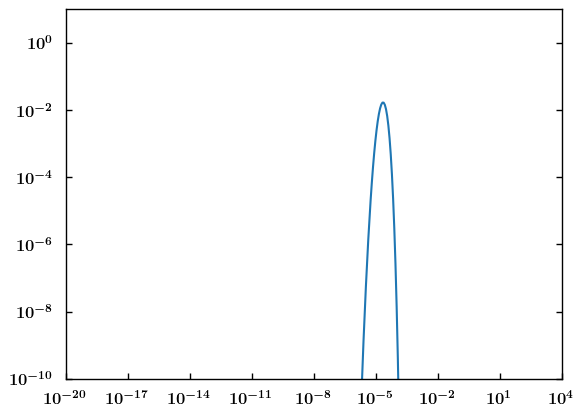

In [33]:
plt.loglog(mPBH, fPBH)
plt.ylim(1e-10, 1e1)
plt.xlim(1e-20, 1e4)
